# Data Agumentation Problem
#### Here you need to compare two models with and without agumentation to see the difference

### Import libraries

In [85]:
import glob
import cv2
import numpy as np
import random
import os
from PIL import Image
import cv2
from sklearn.model_selection import train_test_split
import itertools 

### Read Images

In [2]:
from google.colab import files
uploaded = files.upload()

Saving data_aug-20221101T192103Z-001.zip to data_aug-20221101T192103Z-001.zip


In [3]:
# First we should read all the images from the provided directory,
# 1. first unzip the .zip file attached with homeworks
# 2. read images from directory
# 3. create labels array



########################
! unzip data_aug-20221101T192103Z-001.zip && rm data_aug-20221101T192103Z-001.zip
########################


Archive:  data_aug-20221101T192103Z-001.zip
  inflating: data_aug/cat.7305.jpg   
  inflating: data_aug/dog.12247.jpg  
  inflating: data_aug/dog.306.jpg    
  inflating: data_aug/cat.4344.jpg   
  inflating: data_aug/cat.1807.jpg   
  inflating: data_aug/dog.11833.jpg  
  inflating: data_aug/cat.5077.jpg   
  inflating: data_aug/dog.10221.jpg  
  inflating: data_aug/dog.6503.jpg   
  inflating: data_aug/cat.5009.jpg   
  inflating: data_aug/cat.7738.jpg   
  inflating: data_aug/dog.9719.jpg   
  inflating: data_aug/dog.9374.jpg   
  inflating: data_aug/cat.10172.jpg  
  inflating: data_aug/cat.2482.jpg   
  inflating: data_aug/dog.42.jpg     
  inflating: data_aug/cat.1021.jpg   
  inflating: data_aug/dog.658.jpg    
  inflating: data_aug/dog.1989.jpg   
  inflating: data_aug/dog.6891.jpg   
  inflating: data_aug/dog.301.jpg    
  inflating: data_aug/cat.1666.jpg   
  inflating: data_aug/dog.4439.jpg   
  inflating: data_aug/cat.6706.jpg   
  inflating: data_aug/cat.11843.jpg  
  infl

In [139]:
images=[]
labels=[]
for image in os.listdir('data_aug'):
  images.append(np.array(Image.open('data_aug/'+str(image)).convert('RGB')))
  if (image.endswith(".jpg")):
      if image.split('.')[0]=="cat":
        labels.append(0)
      if image.split('.')[0]=="dog":
        labels.append(1)  

y_train = np.array(labels)      

### Prepare Dataset

In [5]:
# Normalize your dataset in a way to have a image dataset with pixles in range (0 to 1)

########################
images = np.array(images)
images = np.divide(images,255)
########################


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  after removing the cwd from sys.path.


In [6]:
# Resize your images to (28 * 28)
########################
x_train=[]
for x in images:
  img_resized = cv2.resize(x, (28, 28))
  x_train.append(img_resized)
########################


In [7]:
# Flatten your dataset images 
########################
x_train = np.array(x_train)
x_train = x_train.flatten().reshape(100, 2352)
########################


In [8]:
# Check your dataset and labels to be a numpy ndarray of sizes (800, 28 * 28 * 3) and (800, 1) respectively.


########################
print(y_train.shape)
print(x_train.shape)
########################

(100,)
(100, 2352)


### Create your Model

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

In [10]:
# create a simple model of Keras MLP with desired number of dense layers and units and activation function
# don't forget to shuffle the data
# this is a binary classification problem



########################
model = Sequential()
model.add(Dense(512, input_shape=(2352, ), activation='relu'))
model.add(Dense(768, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.add(Dense(1, activation='sigmoid'))
########################

In [11]:
# Split your dataset to test and train with your desired implementation
# use sklearn.model_selection.train_test_split


########################
X_train, X_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.3)
########################

In [12]:
# Compile with your desired optimizer and loss function with 'accuracy' as metric
# # Don't forget to monitor the overfitting, you should take care of val_accuracy and val_loss

########################
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#
# uncomment below and complete the code
history = model.fit(X_train, y_train, epochs=40, batch_size=10, validation_split=0.2)
########################



Epoch 1/40
6/6 [==============================] - 1s 48ms/step - loss: 0.7016 - accuracy: 0.4643 - val_loss: 0.7058 - val_accuracy: 0.4286
Epoch 2/40
6/6 [==============================] - 0s 18ms/step - loss: 0.6956 - accuracy: 0.5000 - val_loss: 0.7055 - val_accuracy: 0.4286
Epoch 3/40
6/6 [==============================] - 0s 14ms/step - loss: 0.6956 - accuracy: 0.5000 - val_loss: 0.7051 - val_accuracy: 0.4286
Epoch 4/40
6/6 [==============================] - 0s 16ms/step - loss: 0.6954 - accuracy: 0.5000 - val_loss: 0.7048 - val_accuracy: 0.4286
Epoch 5/40
6/6 [==============================] - 0s 14ms/step - loss: 0.6952 - accuracy: 0.5000 - val_loss: 0.7044 - val_accuracy: 0.4286
Epoch 6/40
6/6 [==============================] - 0s 15ms/step - loss: 0.6954 - accuracy: 0.5000 - val_loss: 0.7039 - val_accuracy: 0.4286
Epoch 7/40
6/6 [==============================] - 0s 14ms/step - loss: 0.6950 - accuracy: 0.5000 - val_loss: 0.7037 - val_accuracy: 0.4286
Epoch 8/40
6/6 [===========

### Plot results

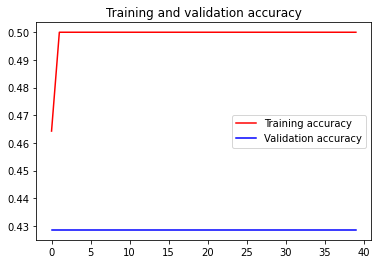

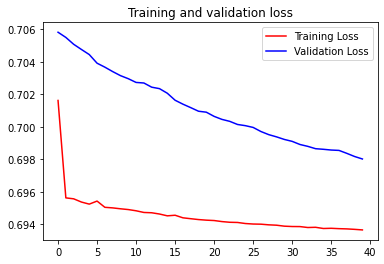

In [13]:
# Plot your data

import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Evaluate results

In [14]:
# Evaluate your model on the test data


########################
model.evaluate(
    x=X_test,
    y=y_test,
)
########################


1/1 [==============================] - 0s 20ms/step - loss: 0.6916 - accuracy: 0.5333


[0.6915684938430786, 0.5333333611488342]

# Compare results with and without using agumentation
### Now we need to do agumentation to create more images to help us overcome underfitting

### Agumentation Methods
Here you should do the agumentation methods to produce more images


In [15]:
# In this cell you need to implement agumentation methods to increase our data
# NOTICE! Only use libraries in CV2 or others, DON'T use KERAS and Pytorch!


def fill(img, h, w):
    ''' 
    we use this function to resize the shifted image and fill border pixles with different methods
    
    arguments 
    input img: a Numpy ndarray from any size of h * w * ch
          h: an integer defining the height of target image
          w: an integer defining the width of target image
    
    output: resized and interpolated image 

    '''
        
    img = cv2.resize(img, (h, w), cv2.INTER_CUBIC)
    return img


def horizontal_shift(img, ratio=0.5):

    ''' 
    we use this function to shift the image horizontally with the given ratio
    width_target = width_input - ratio * width_input
    
    Hint: select ratio in range (-ratio to ratio) uniformly, to simulate horizontally shift to right and left with different ratios


    arguments 
    input img: a Numpy ndarray from any size of h * w * ch
          ratio: a float number between 0 and 1
    
    output: resized and interpolated image 

    '''
    
    if ratio > 1 or ratio < 0:
        print('Value should be less than 1 and greater than 0')
        return img
    ratio = random.uniform(-ratio, ratio) # you can change this
    h, w = img.shape[:2]
    to_shift = w*ratio
    if ratio > 0:
        img = img[:, :int(w-to_shift), :]
    if ratio < 0:
        img = img[:, int(-1*to_shift):, :]

    img = fill(img, h, w) # fill image borders

    return img


In [16]:
    
def vertical_shift(img, ratio=0.5):

    ''' 
    we use this function to shift the image vertically with the given ratio
    width_target = width_input - ratio * width_input
    
    Hint: select ratio in range (-ratio to ratio) uniformly, to simulate vertically shift to up and down with different ratios


    arguments 
    input img: a Numpy ndarray from any size of h * w * ch
          ratio: a float number between 0 and 1
    
    output: resized and interpolated image 

    '''

    if ratio > 1 or ratio < 0:
        print('Value should be less than 1 and greater than 0')
        return img
    ratio = random.uniform(-ratio, ratio)
    h, w = img.shape[:2]
    to_shift = h*ratio
    if ratio > 0:
        img = img[:int(h-to_shift), :, :]
    if ratio < 0:
        img = img[int(-1*to_shift):, :, :]
        
    img = fill(img, h, w)

    return img



In [17]:
def brightness(img, low, high):

    ''' 
    we use this function to change the brightness of the image with given high and low values
    
    Hint: first convert to HSV color domain, Next make your image brighter or darker then convert back to BGR

    arguments 
    input img: a Numpy ndarray from any size of h * w * ch
          low:
          high:
    
    output: image with different brightness

    '''

    value = random.uniform(low, high)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    hsv = np.array(hsv, dtype = np.float64)
    hsv[:,:,1] = hsv[:,:,1]*value
    hsv[:,:,1][hsv[:,:,1]>255]  = 255
    hsv[:,:,2] = hsv[:,:,2]*value 
    hsv[:,:,2][hsv[:,:,2]>255]  = 255
    hsv = np.array(hsv, dtype = np.uint8)
    img = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    
    return img

In [18]:

def zoom(img, value):

    ''' 
    we use this function to zoom the image with given value
    
    arguments 
    input img: a Numpy ndarray from any size of h * w * ch
          value: an integer number indicating the zoom effect
    
    output: zoomed image

    '''
    
    if value > 1 or value < 0:
        print('Value for zoom should be less than 1 and greater than 0')
        return img
    value = random.uniform(value, 1)
    h, w = img.shape[:2]
    h_taken = int(value*h)
    w_taken = int(value*w)
    h_start = random.randint(0, h-h_taken)
    w_start = random.randint(0, w-w_taken)
    img = img[h_start:h_start+h_taken, w_start:w_start+w_taken, :]
    
    img = fill(img, h, w)

    return img

In [19]:
def channel_shift(img, value):

    ''' 
    we use this function to shift color channels to play with colors in the image
    
    arguments 
    input img: a Numpy ndarray from any size of h * w * ch
          value: an integer number indicating the color change effect
    
    output: image with changed colors

    '''
    
    value = int(random.uniform(-value, value))
    img = img + value
    img[:,:,:][img[:,:,:]>255]  = 255
    img[:,:,:][img[:,:,:]<0]  = 0
    img = img.astype(np.uint8)
    
    return img

In [20]:
def horizontal_flip(img):

    ''' 
    we use this function to flip the image horizontally

    arguments 
    input img: a Numpy ndarray from any size of h * w * ch
    
    output: horizontally fliped image

    '''

    return cv2.flip(img, 1)


In [21]:
def vertical_flip(img):

    ''' 
    we use this function to flip the image vertically
    
    arguments 
    input img: a Numpy ndarray from any size of h * w * ch
    
    output: vertically fliped image

    '''
    
    return cv2.flip(img, 0)


### Prepare your dataset

In [140]:
# For each image in our dataset run the previous methods and create a new dataset

    ########################
images1=[]
for image in images:
    i=fill(image,10,10)
    images1.append(i)
    ########################



In [141]:
images2=[]
for image in images:
    i=horizontal_shift(image)
    images2.append(i)
    

In [142]:
images3=[]
for image in images:
    i=vertical_shift(image)
    images3.append(i)

In [143]:
images4=[]
for image in images:
    i=brightness(image.astype('float32'),20,30)
    images4.append(i)

In [144]:
images5=[]
for image in images:
    i=zoom(image,0.5)
    images5.append(i)

In [145]:
images6=[]
for image in images:
    i=channel_shift(image,10)
    images6.append(i)

In [146]:
images7=[]
for image in images:
    i=horizontal_flip(image)
    images7.append(i)

In [147]:
images8=[]
for image in images:
    i=vertical_flip(image)
    images8.append(i)


In [148]:
images_aug = list(itertools.chain(images1,images2,images3,images4,images5,images6,images7,images8)) 

In [123]:
images_aug = np.array(images_aug)     

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


In [124]:

# Extend your labels array new size with correct labels maped to each agumented image

    ########################
labels_aug = list(itertools.chain(labels,labels,labels,labels,labels,labels,labels,labels)) 
labels_aug = np.array(labels_aug)   
    ########################


In [125]:
# Normalize your dataset in a way to have a image dataset with pixles in range (0 to 1)

########################
images_aug = np.divide(images_aug,255)
########################


In [126]:
# Resize your images to (28 * 28)


########################
x_train_aug=[]
for x in images_aug:
  img_resized = cv2.resize(x, (28, 28))
  x_train_aug.append(img_resized)
########################


In [127]:
# Flatten your dataset images 


########################
x_train_aug = np.array(x_train_aug)
x_train_aug = x_train_aug.flatten().reshape(800, 2352)
########################


In [128]:
y_train_aug = np.array(labels_aug)      

In [129]:
# Check your dataset and labels to be a numpy ndarray of sizes (800, 28 * 28 * 3) and (800, 1) respectively.


########################
print(x_train_aug.shape)
print(y_train_aug.shape)
########################

(800, 2352)
(800,)


### Create your model

In [130]:
# create a simple model of Keras MLP with desired number of dense layers and units and activation function
# don't forget to shuffle the data
# this is a binary classification problem



########################
model = Sequential()
model.add(Dense(512, input_shape=(2352, ), activation='relu'))
model.add(Dense(768, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.add(Dense(1, activation='sigmoid'))
########################

In [ ]:
# Split your dataset to test and train with the desired implementation
# use sklearn.model_selection.train_test_split


########################
X_train_aug, X_test_aug, y_train_aug, y_test_aug = train_test_split(x_train_aug, y_train_aug, test_size=0.3)
########################

In [133]:
# Compile your model to introduce loss function optimizer and metrices to monitor accuracy metric and train on the data
# Don't forget to monitor the overfitting, you should take care of val_accuracy and val_loss
#
# uncomment below and complete the code
########################
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#
# uncomment below and complete the code
history = model.fit(X_train_aug, y_train_aug, epochs=40, batch_size=800, validation_split=0.2)

########################



Epoch 1/40
1/1 [==============================] - 1s 1s/step - loss: 0.6945 - accuracy: 0.5000 - val_loss: 0.6983 - val_accuracy: 0.5268
Epoch 2/40
1/1 [==============================] - 0s 141ms/step - loss: 0.7027 - accuracy: 0.5000 - val_loss: 0.6905 - val_accuracy: 0.5268
Epoch 3/40
1/1 [==============================] - 0s 147ms/step - loss: 0.6947 - accuracy: 0.5000 - val_loss: 0.6912 - val_accuracy: 0.5268
Epoch 4/40
1/1 [==============================] - 0s 146ms/step - loss: 0.6948 - accuracy: 0.5000 - val_loss: 0.6912 - val_accuracy: 0.5268
Epoch 5/40
1/1 [==============================] - 0s 169ms/step - loss: 0.6946 - accuracy: 0.5022 - val_loss: 0.6907 - val_accuracy: 0.5446
Epoch 6/40
1/1 [==============================] - 0s 164ms/step - loss: 0.6940 - accuracy: 0.5156 - val_loss: 0.6909 - val_accuracy: 0.5446
Epoch 7/40
1/1 [==============================] - 0s 145ms/step - loss: 0.6932 - accuracy: 0.5089 - val_loss: 0.6943 - val_accuracy: 0.4911
Epoch 8/40
1/1 [=======

### Plot your results

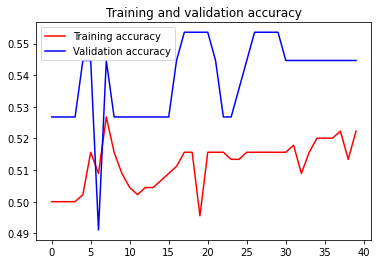

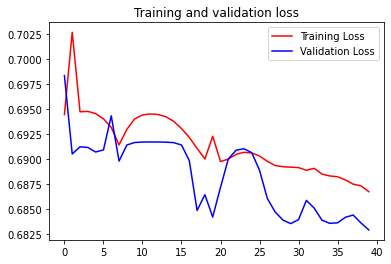

In [134]:
# Plot your data

import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Evaluate results

In [136]:
# Evaluate your model on the test data


########################
model.evaluate(
    x=X_test_aug,
    y=y_test_aug,
)
########################


8/8 [==============================] - 0s 6ms/step - loss: 0.6958 - accuracy: 0.4875


[0.6958144307136536, 0.48750001192092896]

# Compare your results with and without using agumentation to see the difference

## Optional Bonus Activity

In [155]:
# Optional

# Keras data Augmentation

#use the bellow links

# https://keras.io/guides/keras_cv/custom_image_augmentations/

# https://keras.io/api/preprocessing/image/
